<a href="https://colab.research.google.com/github/napoles-uach/FDTD/blob/master/NS_FDTD_PMLv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esta versión funciona correctamente. No modificarla.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.ion()

algo de texto incluyebdi latex $e^{-\pi \theta}$

In [ ]:
def Gaussian(x,t,sigma):
    return np.exp(-(x-t)**2/(2*sigma**2))
def free(npts):
    return np.zeros(npts)
def step(npts,v0):
    v = free(npts)
    v[npts/2:] = v0
    return v
def barrier(npts,v0,thickness):
    v = free(npts)
    v[npts/2:npts/2+thickness] = v0
    return v
def fillax(x,y,*args,**kw):
    xx = np.concatenate((x,np.array([x[-1],x[0]],x.dtype)))
    yy = np.concatenate((y,np.zeros(2,y.dtype)))
    return pylab.fill(xx, yy, *args,**kw)

In [ ]:
N    = 500     #  Number of spatial points.

                #  before anything reaches the boundaries.
Tp   = 50   

In [ ]:
le=40
longitud=le*1e-9
dx=longitud/N
#dx   = 0.05e-9    #  Spatial resolution
m    = 9.1e-31    #  Particle mass
hbar = 1.054e-34    #  Plank's constant
dx

8.000000000000001e-11

In [ ]:
X    = dx*np.linspace(0,N,N)        #  Spatial axis.
eV2J=1.60218e-19

In [ ]:

THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)
POTENTIAL = 'step'

energy=0.5
V0   = 0.1  #  eV
lambd=2*np.pi*hbar/np.sqrt(2*m*energy*eV2J)
lambd=int(lambd/dx)+1
sigma = 0.5*lambd 
x0 = N/2.0-1*sigma
dx
lambd*dx*1e10

17.6

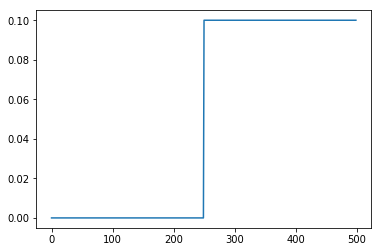

In [ ]:
if POTENTIAL=='free':
    V = free(N)
elif POTENTIAL=='step':
    V = step(N,V0)
elif POTENTIAL=='barrier':
    V = barrier(N,V0,THCK)
else:
    raise ValueError("Unrecognized potential type: %s" % POTENTIAL)

Vmax = V.max()
plt.plot(V)

In [ ]:
dt   = 0.25*(m/hbar)*dx**2# hbar/(2*hbar**2/(m*dx**2)+Vmax)        

#c1=1.0/8.0
#c2=dt/hbar
arg=np.pi/(2*lambd)
uns=np.sin( arg**2 )/np.sin( 2*arg )
c1=0.5*uns/np.sin(2*arg)
c2=2*uns*np.sin(2*arg)/np.abs(energy-V0)
c2V  = c2*V


In [ ]:
psi_r = np.zeros((3,N)) #  Real
psi_i = np.zeros((3,N)) #  Imaginary
psi_p = np.zeros(N,)   # Observable probability (magnitude-squared
psi_rl = np.zeros(N,)
psi_im = np.zeros(N,)    #  of the complex wave function).
#  Temporal indexing constants, used for accessing rows of the wavefunctions.
PA = 0                 #  Past
PR = 1                 #  Present
FU = 2                 #  Future

In [ ]:
k0=2*np.pi/(lambd)
xn = range(1,N)
x = X[xn]/dx    #  Normalized position coordinate
gg = Gaussian(x,x0,sigma)
cx = np.cos(k0*(x-x0))
sx = np.sin(k0*(x-x0))
psi_rl = cx*gg
psi_im = sx*gg
#psi_r[PA,xn] = cx*gg
#psi_i[PA,xn] = sx*gg
# Initial normalization of wavefunctions
#   Compute the observable probability.
psi_p = psi_rl**2 + psi_im**2
#  Normalize the wave functions so that the total probability in the simulation
#  is equal to 1.
P   =psi_p.sum()                      #  Total probability.
nrm = np.sqrt(P)

psi_rl /= nrm
psi_im /= nrm
psi_p = psi_rl**2 + psi_im**2
P=psi_p.sum()
P

1.0

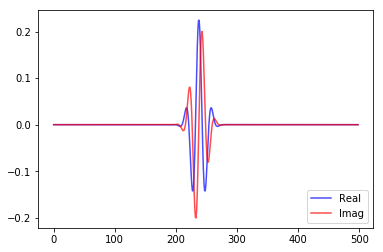

In [ ]:
pylab.figure()
#xmin = X.min()
#xmax = X.max()
#ymax = 1.5*(psi_rl).max()
#pylab.axis([xmin,xmax,-ymax,ymax])

lineR, = pylab.plot(psi_rl,'b',alpha=0.7,label='Real')
lineI, = pylab.plot(psi_im,'r',alpha=0.7,label='Imag')
#lineP, = pylab.plot(X,10*psi_p,'k',label='Prob')
#pylab.title('Potential height: %.2e' % V0)
pylab.legend(loc='lower right')

In [ ]:
IDX1 = range(1,N-1)                            #  psi [ k ]
IDX2 = range(2,N)                              #  psi [ k + 1 ]
IDX3 = range(0,N-2)

In [ ]:
gammar=np.ones(N-2,)
gammai=np.zeros(N-2,)
IDX3[N-3]
#gamma_r=1.0
#gamma_i=1.0

497

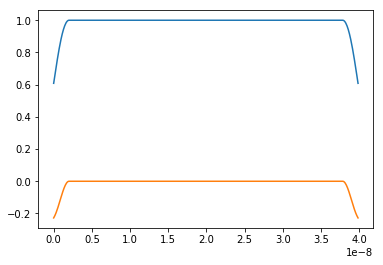

In [ ]:
kpml1=int((longitud/20.0)/dx)
R=(1+1j)/np.sqrt(2)
for k in range(kpml1):
#    if k<kpml1:
    fac=5e-4
    sigma=fac*(k-kpml1)**2
    gammax=1.0/(1.0+R*sigma)**2
    gammar[k]=gammax.real
    gammai[k]=gammax.imag
    sigma=fac*(k-kpml1)**2
    gammax=1.0/(1.0+R*sigma)**2
    gammar[N-k-3]=gammax.real
    gammai[N-k-3]=gammax.imag
#gamma_r=np.ones(N-2,)
#gamma_i=np.zeros(N-2,)
pylab.plot(X[IDX3],gammar)
pylab.plot(X[IDX3],gammai)
gammax=0.0

In [ ]:
T=0

('PE=', 0.097793765460054, 0.39734344965528545, 0.49513721511533948)


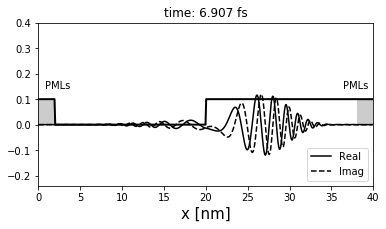

In [ ]:
T=T+100

for t in range(T+1):
    for k in range(1,N-2):
        deltai=psi_im[k+1]-2.0*psi_im[k]+psi_im[k-1]
        deltar=psi_rl[k+1]-2.0*psi_rl[k] + psi_rl[k-1]
        psi_rl[k]=psi_rl[k]-c1*(gammar[k]*deltai+gammai[k]*deltar)+c2V[k]*psi_im[k]



    for k in range(1,N-2):
        deltar=psi_rl[k+1]-2.0*psi_rl[k] + psi_rl[k-1]
        deltai=psi_im[k+1]-2.0*psi_im[k]+psi_im[k-1]
        psi_im[k]=psi_im[k]+c1*( gammar[k]*deltar-gammai[k]*deltai )- c2V[k]*psi_rl[k]

        

#Lap = np.zeros(N,)+1j*np.zeros(N,)
#KE = np.zeros(N,)+1j*np.zeros(N,)
#psi=psi_rl+1j*psi_im
#psic=psi_rl-1j*psi_im
#POT2=psi*psic*V
#PE=POT2.sum()
#Lap[1+2:N-1-2]=psi[2+2:N-2] - 2*psi[1+2:N-1-2] + psi[0+2:N-2-2]
#KE[1+2:N-1-2]=Lap[1+2:N-1-2]*psic[1+2:N-1-2]
#kinet=KE.sum().real
#J2eV=1.0/eV2J
#kinet=-J2eV*kinet*(hbar/dx)**2/(2*m)
#kinet

#mod2Psi=psi_rl[PR]**2+psi_im[PR]**2




from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
pylab.figure()
#xmin = X.min()
#xmax = X.max()
ymax = 1.5*(psi_r[PR]).max()

pylab.axis([0,le,-0.24,0.4])

time=t*dt*1e15
pylab.title('time: %.3f'' fs' %time)


#if Vmax !=0 :
    # Scaling factor for energies, so they fit in the same plot as the
    # wavefunctions
Efac = ymax
V_1 = V[0:N-1]
pm=V[N-kpml1:N-1]
pylab.plot(X[0:N-1]*1e9,V_1,'black',lw=2)   #  Potential line.
lineR, = pylab.plot(X[0:N-1]*1e9,psi_rl,'-',alpha=1,label='Real',color='black')
lineI, = pylab.plot(X[0:N-1]*1e9,psi_im,'--',alpha=1,label='Imag',color='black')
fillax(X[N-kpml1:N-1]*1e9,pm, facecolor='black', alpha=0.2,zorder=0)
pm2=V[0:kpml1]
pm2[0:kpml1]=V0
fillax(X[0:kpml1]*1e9,pm2, facecolor='black', alpha=0.2,zorder=0)

#pylab.plot(X[150:N-50]*1e9,pm2,'black',lw=2)   #  Potential line.
    # Plot the wavefunction energy, in the same scale as the potential
    #pylab.axhline(E*Efac,color='g',label='Energy',zorder=1)
pylab.legend(loc='lower right')
pylab.xlabel('x [nm]',fontsize=15)
pylab.annotate('PMLs',xy=(343, 140), xycoords='figure points')
pylab.annotate('PMLs',xy=(45, 140), xycoords='figure points')
pylab.draw()
#pylab.xlim(xmin,xmax)
pylab.savefig('wave.pdf', dpi=300,bbox_inches='tight')

import os
os.system('say "done"')

PE=0.0
EC=0.0
#lap_r=0.0
#lap_i=0.0
for k in range(kpml1,N-kpml1):
    PE=PE+V[k]*(psi_rl[k]**2+psi_im[k]**2)
#    Lap[k]=psi[k+1] - 2*psi[k] + psi[k-1]
#    KE[k]=Lap[k]*psic[k]
    lap_r=psi_rl[k+1]-2*psi_rl[k]+psi_rl[k-1]
    lap_i=psi_im[k+1]-2*psi_im[k]+psi_im[k-1]
    EC=EC-(psi_rl[k]*lap_r+psi_im[k]*lap_i)
EC=EC*((hbar/dx)**2/(2*m))/eV2J    
#kinet=KE.sum().real
J2eV=1.0/eV2J
#kinet=-J2eV*kinet*(hbar/dx)**2/(2*m)
print("PE=",PE,EC,PE+EC)

# OK